Variation of frontier curve with ESG risk scores

In [ ]:
import pandas_datareader.data as web
import datetime
import pandas as pd
import yfinance as yf
import numpy as np
import math as m
import random

# Read the Excel file
df = pd.read_csv('ESG_Markovitz_score.csv')

# df = df.head(20)


In [ ]:
# Dictionary to store the daily returns for each company
returns_dict = {}

# Download data and calculate daily returns for each company
for ticker in df['company_ticker']:
    data = yf.download(ticker, start='2019-08-13', end='2024-08-13')
    # Calculate daily returns (difference in adjusted close prices)
    data['Return'] = data['Adj Close'].diff()
    # Store the returns in the dictionary
    returns_dict[ticker] = data['Return']

# Convert the returns dictionary to a DataFrame
returns_df = pd.DataFrame(returns_dict)

# Drop NaN values (the first return will be NaN since there's no previous day)
returns_df = returns_df.dropna()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******

In [ ]:
pBar = returns_df.mean()
print(pBar)
pBar_array = pBar.to_numpy()

ARE    -0.009138
EQIX    0.252000
HSIC    0.004463
IBM     0.069214
MHK     0.023445
          ...   
RL      0.059538
SNPS    0.309244
TGT     0.047633
TJX     0.048622
WAT     0.099714
Length: 430, dtype: float64


In [ ]:
# Initialize the covariance matrix DataFrame
tickers = df['company_ticker']
cov_matrix = pd.DataFrame(index=tickers, columns=tickers)

# Calculate covariance and variance
for ticker1 in tickers:
    for ticker2 in tickers:
        if ticker1 == ticker2:
            # Calculate variance for the stock
            variance = np.var(returns_df[ticker1], ddof=1)  # Sample variance
            cov_matrix.loc[ticker1, ticker2] = variance
        else:
            # Calculate covariance between the two stocks
            covariance = np.cov(returns_df[ticker1], returns_df[ticker2])[0][1]
            cov_matrix.loc[ticker1, ticker2] = covariance

# Convert all elements to floats (optional, but recommended)
cov_matrix = cov_matrix.astype(float)

# Print the covariance matrix
print(cov_matrix)


company_ticker        ARE        EQIX      HSIC       IBM        MHK  \
company_ticker                                                         
ARE              6.587841   19.794898  1.280894  2.010854   3.625629   
EQIX            19.794898  161.453612  4.294146  7.842447  10.272382   
HSIC             1.280894    4.294146  1.594096  0.905461   1.794220   
IBM              2.010854    7.842447  0.905461  3.666713   2.478424   
MHK              3.625629   10.272382  1.794220  2.478424  12.234934   
...                   ...         ...       ...       ...        ...   
RL               2.419712    7.389971  1.260246  1.795407   4.901805   
SNPS             6.125599   38.096283  1.864675  3.213592   6.603713   
TGT              3.154640   13.024893  1.080671  1.742207   3.941579   
TJX              1.260945    4.367122  0.608081  0.876034   1.835861   
WAT              6.263084   28.711896  2.883834  3.431518   7.563188   

company_ticker      ORCL       PANW       PFG       SPG       U

In [ ]:
cov_matrix_np = cov_matrix.to_numpy()
cov_matrix_np

array([[  6.58784102,  19.79489835,   1.28089353, ...,   3.15463952,
          1.26094505,   6.26308383],
       [ 19.79489835, 161.45361153,   4.29414625, ...,  13.0248933 ,
          4.36712242,  28.7118965 ],
       [  1.28089353,   4.29414625,   1.59409566, ...,   1.08067146,
          0.60808051,   2.88383427],
       ...,
       [  3.15463952,  13.0248933 ,   1.08067146, ...,  11.29063287,
          0.90578936,   6.02314808],
       [  1.26094505,   4.36712242,   0.60808051, ...,   0.90578936,
          1.33915719,   2.34787208],
       [  6.26308383,  28.7118965 ,   2.88383427, ...,   6.02314808,
          2.34787208,  30.10025219]])

In [ ]:
ESG_scores = df['totalEsg']
ESG_scores = ESG_scores.to_numpy()
ESG_scores

array([13.89, 13.88, 13.95, 14.14, 14.14, 13.89, 13.92, 14.19, 13.98,
       13.92, 41.6 , 41.66, 40.55, 39.6 , 38.72, 13.64, 13.82, 13.87,
       13.66, 13.61, 13.59, 37.35, 37.72, 36.91, 36.6 , 36.24, 36.17,
       36.07, 35.69, 35.92, 35.19, 35.43, 38.81, 34.61, 34.76, 33.91,
       34.16, 34.08, 33.76, 33.61, 33.7 , 33.52, 13.08, 13.29, 13.35,
       13.1 , 13.09, 13.13, 13.09, 13.05, 13.04, 13.23, 33.11, 33.21,
       32.92, 32.82, 32.98, 32.98, 32.98, 32.56, 31.79, 31.82, 31.97,
       31.32, 31.61, 31.32, 30.83, 30.73, 30.79, 30.61, 30.49, 30.53,
       30.67, 30.45, 30.26, 30.18, 30.38, 30.26, 12.74, 12.59, 12.51,
       12.75, 12.61, 12.44, 12.64, 12.81, 12.41, 12.86, 29.93, 30.  ,
       30.12, 29.8 , 29.48, 29.63, 29.33, 29.24, 29.19, 29.34, 29.26,
       29.23, 29.35, 29.28, 28.73, 28.84, 28.62, 28.61, 28.6 , 28.5 ,
       28.37, 28.48, 28.45, 28.57, 28.52, 28.3 , 28.3 , 28.36, 28.26,
       27.95, 27.65, 27.64, 12.26, 12.1 , 12.02, 12.1 , 11.86, 11.91,
       11.78, 12.05,

In [ ]:
def Markovitz_Weights(rmin, cov_matrix_np, pBar_array):
    N = len(cov_matrix_np)
    o = np.ones(N)
    SigmaInv = np.linalg.inv(cov_matrix_np)
    A = np.dot(pBar_array.T, np.dot(SigmaInv, pBar_array))
    B = np.dot(pBar_array.T, np.dot(SigmaInv, o))
    C = np.dot(o.T, np.dot(SigmaInv, o))

    # Calculate the raw weights using the given formula
    raw_weights = (1 / (A * C - B**2)) * np.dot(SigmaInv, (((C * rmin - B) * pBar_array) + (A - B * rmin) * o))

    #Adjust weights to ensure no short selling (weights >= 0)
    # raw_weights[raw_weights < 0] = 0

    # Rescale weights to sum to 1
    # total_weight = np.sum(raw_weights)
    # if total_weight > 0:  # Avoid division by zero
    #     weights = raw_weights / total_weight
    # else:
    #     weights = raw_weights  # If all weights are zero, keep them as is

    return raw_weights/(np.sum(raw_weights))

In [ ]:
def ESG_adjusted_Markovitz_weights(rmin, cov_matrix_np, pBar_array, ESG_scores, score_min):
  H = np.vstack((pBar_array, ESG_scores))
  F = np.array([rmin, score_min])
  SigmaInv = np.linalg.inv(cov_matrix_np)
  raw_weights = SigmaInv @ H.T @ np.linalg.inv(H @ SigmaInv @ H.T) @ F
  # raw_weights[raw_weights < 0] = 0
  # total_weight = np.sum(raw_weights)
  # if total_weight > 0:  # Avoid division by zero
  #   weights = raw_weights / total_weight
  # else:
  #   weights = raw_weights  # If all weights are zero, keep them as is

  return raw_weights/np.sum(raw_weights)
for i in range (0,8):
  i = i*5
  print(ESG_adjusted_Markovitz_weights(0.22, cov_matrix_np, pBar_array, ESG_scores, i))

[-4.43572673e-02 -5.34717270e-03 -6.10559660e-02 -1.09984718e-02
 -4.37924390e-02 -1.21777413e-02  1.50345565e-02 -7.81657220e-02
 -1.11903741e-02  3.46840480e-02  1.23292036e-01 -4.50148862e-02
  2.39646122e-02 -1.87342225e-02 -8.89742044e-03  8.87421577e-02
  3.06523969e-02 -1.51852558e-01  1.44966008e-02 -9.21065163e-03
  1.26226150e-01  1.13647594e-02  1.14941408e-01 -6.95325656e-04
 -3.45698130e-02 -7.52203802e-02  4.09190454e-02 -5.43743910e-02
 -2.88236996e-02  1.81778451e-02 -1.19159697e-02  1.40647045e-02
 -1.56909770e-01  3.55224880e-02 -1.38529899e-01  3.39016478e-02
  4.10325871e-02  5.61710204e-03 -2.04026383e-01  3.58049267e-02
  2.99845173e-01 -2.00036739e-02  7.82713403e-03 -3.57514998e-02
  1.86759939e-01  1.48184105e-03 -4.45235613e-02 -1.34994296e-03
 -5.06229995e-02 -3.02364463e-02  8.23485114e-04  1.77675831e-01
  3.01261798e-02  2.86484177e-01  1.15043108e-01 -4.05712125e-02
  5.06904553e-02  5.70138867e-01 -3.17871656e-02 -9.61873347e-03
 -1.01717897e-01 -1.59447

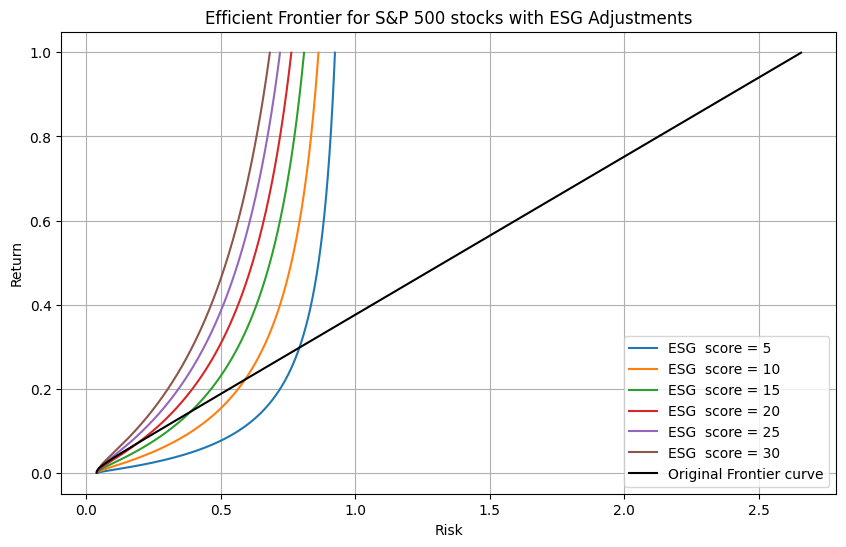

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Function to find intersections between two curves
# def find_intersections(scores_1, scores_2, returns):
#     intersections = []
#     for i in range(1, len(scores_1)):
#         if (scores_1[i-1] - scores_2[i-1]) * (scores_1[i] - scores_2[i]) < 0:
#             f = interp1d([scores_1[i-1], scores_1[i]], [returns[i-1], returns[i]])
#             intersection_return = f(scores_2[i])
#             intersections.append((scores_2[i], intersection_return))
#     return intersections

# Define the risk scores you want to plot
sample_scores = [5, 10, 15, 20, 25, 30]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Initialize a list to store intersections
all_intersections = []

# Iterate over each risk score and plot the efficient frontier
for score in sample_scores:
    risks_2 = []
    risks_1 = []
    minimum_expected_return = []

    for rmin in range(1, 1000):
        rmin = float(rmin) / 1000

        # Calculate the weight vector for the current rmin
        weights_1 = Markovitz_Weights(rmin, cov_matrix_np, pBar_array)
        weights_2 = ESG_adjusted_Markovitz_weights(rmin, cov_matrix_np, pBar_array, ESG_scores, score)

        # Calculate the risk (portfolio variance) for both scenarios
        risk_1 = np.sqrt(np.dot(weights_1.T, np.dot(cov_matrix_np, weights_1)))
        risks_1.append(risk_1)

        risk_2 = np.sqrt(np.dot(weights_2.T, np.dot(cov_matrix_np, weights_2)))
        risks_2.append(risk_2)

        minimum_expected_return.append(rmin)

    # Find intersections and store them
    # intersections = find_intersections(risks_1, risks_2, minimum_expected_return)
    # all_intersections.extend(intersections)

    # Plot the ESG risk-adjusted frontier curve for the current risk score
    plt.plot(risks_2, minimum_expected_return, label=f'ESG  score = {score}')

# Plot the original efficient frontier (without ESG adjustment)
plt.plot(risks_1, minimum_expected_return, label='Original Frontier curve', color='black')

# Plot and label the intersection points
for i, intersection in enumerate(all_intersections):
    plt.scatter(intersection[0], intersection[1], color='red', zorder=5)
    plt.text(intersection[0], intersection[1], f'({intersection[0]:.2f}, {intersection[1]:.2f})',
             fontsize=8, verticalalignment='bottom', horizontalalignment='right')

# Labeling the plot
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier for S&P 500 stocks with ESG Adjustments')
plt.grid(True)
plt.legend()
plt.show()




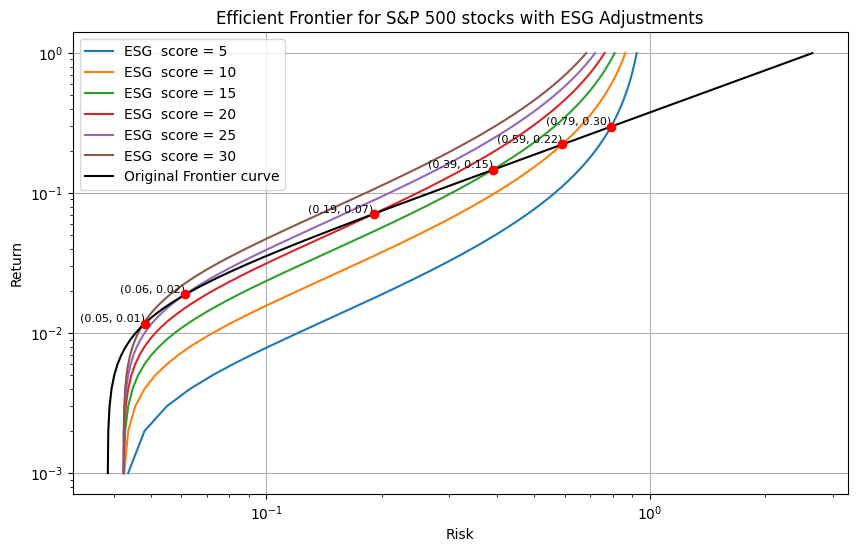

In [ ]:

import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import interp1d

# Function to find intersections between two curves
def find_intersections(scores_1, scores_2, returns):
    intersections = []
    for i in range(1, len(scores_1)):
        if (scores_1[i-1] - scores_2[i-1]) * (scores_1[i] - scores_2[i]) < 0:
            f = interp1d([scores_1[i-1], scores_1[i]], [returns[i-1], returns[i]])
            intersection_return = f(scores_2[i])
            intersections.append((scores_2[i], intersection_return))
    return intersections

# Define the risk scores you want to plot
sample_scores = [5, 10, 15, 20, 25, 30]

# Initialize a figure
plt.figure(figsize=(10, 6))

# Initialize a list to store intersections
all_intersections = []

# Iterate over each risk score and plot the efficient frontier
for score in sample_scores:
    risks_2 = []
    risks_1 = []
    minimum_expected_return = []

    for rmin in range(1, 1000):
        rmin = float(rmin) / 1000

        # Calculate the weight vector for the current rmin
        weights_1 = Markovitz_Weights(rmin, cov_matrix_np, pBar_array)
        weights_2 = ESG_adjusted_Markovitz_weights(rmin, cov_matrix_np, pBar_array, ESG_scores, score)

        # Calculate the risk (portfolio variance) for both scenarios
        risk_1 = np.sqrt(np.dot(weights_1.T, np.dot(cov_matrix_np, weights_1)))
        risks_1.append(risk_1)

        risk_2 = np.sqrt(np.dot(weights_2.T, np.dot(cov_matrix_np, weights_2)))
        risks_2.append(risk_2)

        minimum_expected_return.append(rmin)

    # Find intersections and store them
    intersections = find_intersections(risks_1, risks_2, minimum_expected_return)
    all_intersections.extend(intersections)

    # Plot the ESG risk-adjusted frontier curve for the current risk score
    plt.plot(risks_2, minimum_expected_return, label=f'ESG  score = {score}')

# Plot the original efficient frontier (without ESG adjustment)
plt.plot(risks_1, minimum_expected_return, label='Original Frontier curve', color='black')

# Plot and label the intersection points
for i, intersection in enumerate(all_intersections):
    plt.scatter(intersection[0], intersection[1], color='red', zorder=5)
    plt.text(intersection[0], intersection[1], f'({intersection[0]:.2f}, {intersection[1]:.2f})',
             fontsize=8, verticalalignment='bottom', horizontalalignment='right')

plt.xscale('log')
plt.yscale('log')

# Labeling the plot
plt.xlabel('Risk')
plt.ylabel('Return')
plt.title('Efficient Frontier for S&P 500 stocks with ESG Adjustments in log scale')
plt.grid(True)
plt.legend()
plt.show()


In [ ]:

R = 0.4
weights_1 = Markovitz_Weights(R, cov_matrix_np, pBar_array)
weights_2 = ESG_adjusted_Markovitz_weights(R, cov_matrix_np, pBar_array, ESG_scores, 5)

        # Calculate the risk (portfolio variance) for both scenarios
risk_1 = np.sqrt(np.dot(weights_1.T, np.dot(cov_matrix_np, weights_1)))


risk_2 = np.sqrt(np.dot(weights_2.T, np.dot(cov_matrix_np, weights_2)))

print(risk_1)
print(risk_2)


1.062969729331161
0.8359366690100418


In [ ]:
print(weights_1)


[-4.77079674e-02 -5.62961005e-03 -6.66654277e-02 -1.16402272e-02
 -4.65033685e-02 -1.32475857e-02  1.60155921e-02 -8.42159446e-02
 -1.10467713e-02  2.74469558e-02  1.33690315e-01 -4.78507195e-02
  2.58381249e-02 -2.00772342e-02 -9.58433481e-03  9.46495100e-02
  3.24150114e-02 -1.63001671e-01  1.53672039e-02 -9.70885138e-03
  1.33645133e-01  1.33041489e-02  1.37596369e-01 -5.80131266e-04
 -3.71456514e-02 -7.51624618e-02  4.37801687e-02 -4.55104809e-02
 -3.24338025e-02  2.06443412e-02 -1.24604486e-02  1.63653140e-02
 -1.66041387e-01  3.78408509e-02 -1.45662521e-01  3.36251190e-02
  4.20624743e-02  5.99318828e-03 -2.17685048e-01  4.03056473e-02
  3.27449567e-01 -1.99692269e-02  8.39628961e-03 -3.76926540e-02
  1.84299919e-01  1.52733775e-03 -4.71676988e-02 -9.16050581e-04
 -5.55269312e-02 -3.21216801e-02  1.03724971e-03  1.91813655e-01
  3.24933686e-02  3.06179266e-01  1.23243490e-01 -4.30405443e-02
  5.39089253e-02  6.16047873e-01 -3.36397409e-02 -1.15642217e-02
 -1.09708563e-01 -1.68795

In [ ]:
print(weights_2)


[-3.77614930e-02 -4.49351230e-03 -5.12164508e-02 -9.55134151e-03
 -3.67935140e-02 -9.92026281e-03  1.26650237e-02 -6.53172769e-02
 -9.89287026e-03  3.20599409e-02  1.04290927e-01 -3.82693614e-02
  1.99268607e-02 -1.58011225e-02 -7.47804120e-03  7.49024006e-02
  2.56650557e-02 -1.27227472e-01  1.20577516e-02 -7.78471008e-03
  1.06064822e-01  9.96118447e-03  1.05677893e-01 -5.33449732e-04
 -2.90438218e-02 -6.15291361e-02  3.43446591e-02 -3.98677093e-02
 -2.62767446e-02  1.53803267e-02 -1.02244338e-02  1.22670540e-02
 -1.32141947e-01  2.89769726e-02 -1.15619792e-01  2.71357350e-02
  3.39095656e-02  4.70291883e-03 -1.72287910e-01  3.10419504e-02
  2.52865335e-01 -1.65501277e-02  6.55102547e-03 -2.99009928e-02
  1.61788037e-01  1.22029836e-03 -3.76678325e-02 -1.07348485e-03
 -4.18214317e-02 -2.52878024e-02  5.61086924e-04  1.49556573e-01
  2.48145334e-02  2.39710090e-01  9.63552576e-02 -3.41373242e-02
  4.30554580e-02  4.80395399e-01 -2.66667038e-02 -8.64321954e-03
 -8.52586500e-02 -1.33226

In [ ]:
print(np.sum(weights_1))
print(np.sum(weights_2))

1.0
1.0
